# Retail Sales: Beer, Wine, and Liquor Stores
U.S. Census Bureau, Retail Sales: Beer, Wine, and Liquor Stores [MRTSSM4453USN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/MRTSSM4453USN, June 24, 2019.

In [2]:
import os
import pandas as pd
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Retail Sale Beer Wine Liquor.csv",index_col='DATE',parse_dates=True)
df.rename(columns={"MRTSSM4453USN": "Millions of Dollars"},inplace=True)

In [4]:
df.head()

,Millions of Dollars
DATE,
1992-01-01,1509
1992-02-01,1541
1992-03-01,1597
1992-04-01,1675
1992-05-01,1822


In [5]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01',
               '2019-03-01', '2019-04-01'],
              dtype='datetime64[ns]', name='DATE', length=328, freq='MS')

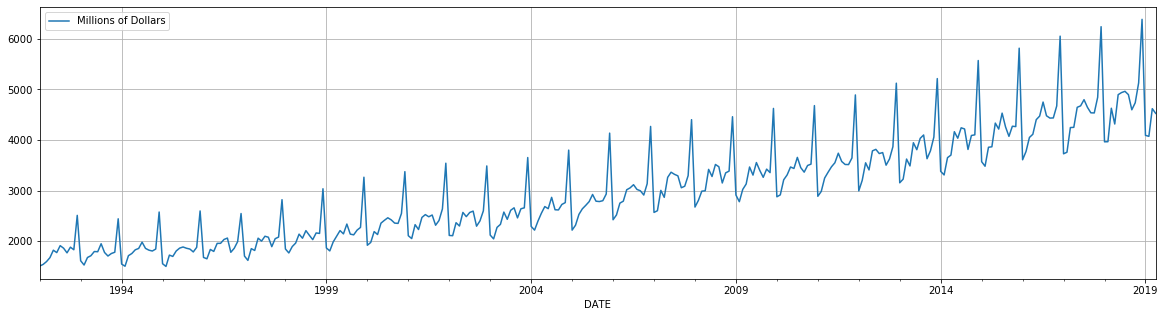

In [6]:
df.plot(figsize=(20,5),grid=True);

## ETS Decomposition

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

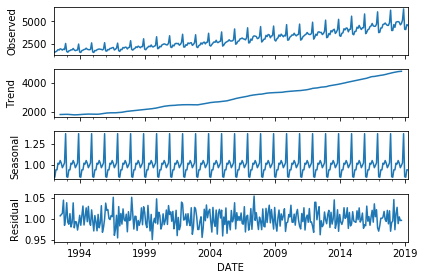

In [8]:
result = seasonal_decompose(df['Millions of Dollars'],model='mul')
result.plot();

## Moving Average
### SMA
#### Simple Moving Average

In [9]:
df['SMA_6'] = df['Millions of Dollars'].rolling(window=6).mean()
df['SMA_12'] = df['Millions of Dollars'].rolling(window=12).mean()

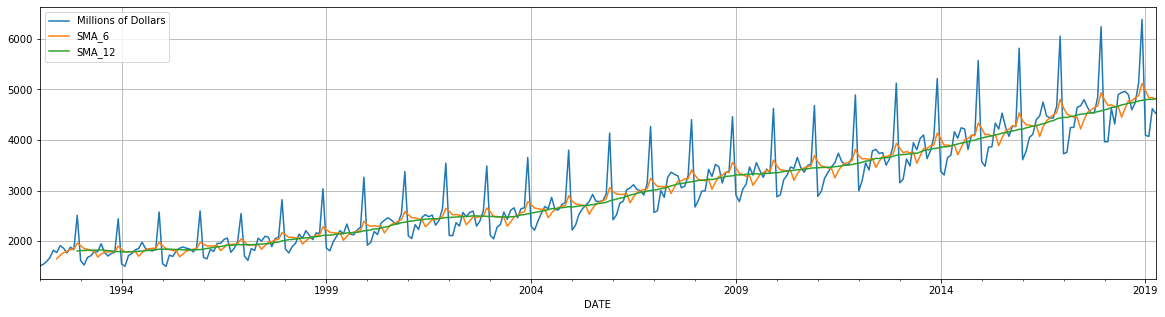

In [10]:
df.plot(figsize=(20,5),grid=True);

### EWMA
#### Exponential Weighted Moving Average

In [11]:
df['EMW_12'] = df['Millions of Dollars'].ewm(span=12,adjust=False).mean()

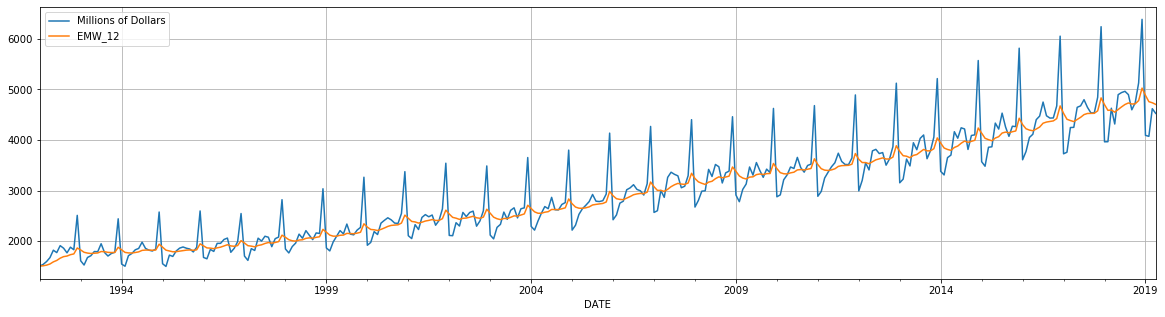

In [12]:
df[['Millions of Dollars','EMW_12']].plot(figsize=(20,5),grid=True);

### Compare SMA to EWMA

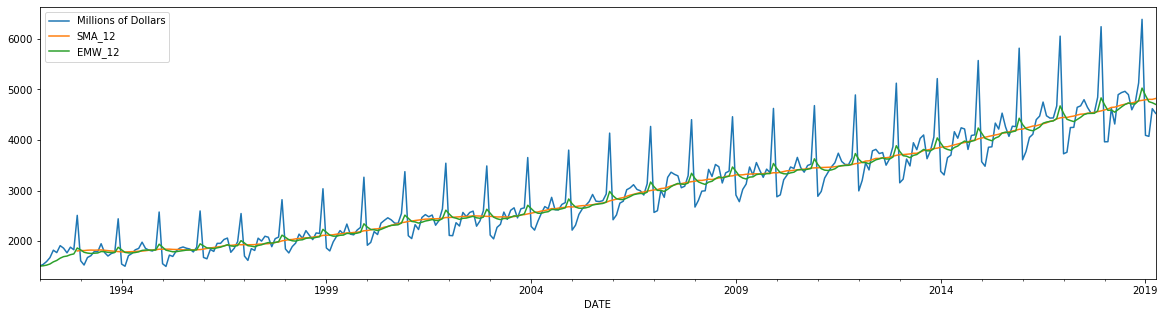

In [13]:
df[['Millions of Dollars','SMA_12','EMW_12']].plot(figsize=(20,5)).autoscale(axis='x',tight=True)

Compare duay residual , evaluate model

## Holt-Winters Methods
### SES
#### Simple Exponential Smoothing

Pai doo wa alpha and beta kue rai

In [14]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [15]:
span = 12
alpha = 2/(span+1)
model = SimpleExpSmoothing(df['Millions of Dollars'])
fitted_model = model.fit(smoothing_level=alpha,optimized=False)
df['SES12'] = fitted_model.fittedvalues.shift(-1)
# df['SES12']=SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)

<div class="alert alert-danger"><strong>NOTE:</strong> For some reason, when <tt>optimized=False</tt> is passed into <tt>.fit()</tt>, the statsmodels <tt>SimpleExpSmoothing</tt> function shifts fitted values down one row. We fix this by adding <tt>.shift(-1)</tt> after <tt>.fittedvalues</tt></div>

In [16]:
df.head()

,Millions of Dollars,SMA_6,SMA_12,EMW_12,SES12
DATE,,,,,
1992-01-01,1509,NaN,NaN,1509.000000,1509.000000
1992-02-01,1541,NaN,NaN,1513.923077,1513.923077
1992-03-01,1597,NaN,NaN,1526.704142,1526.704142
1992-04-01,1675,NaN,NaN,1549.518889,1549.518889
1992-05-01,1822,NaN,NaN,1591.439060,1591.439060


### DES
#### Double Exponential Smoothing

In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [18]:
df['DES_add12'] = ExponentialSmoothing(df['Millions of Dollars'].astype(np.float),trend='add').fit().fittedvalues.shift(-1)
#df['DESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)

C:\Users\pongp\Miniconda3\envs\minimal_ds\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


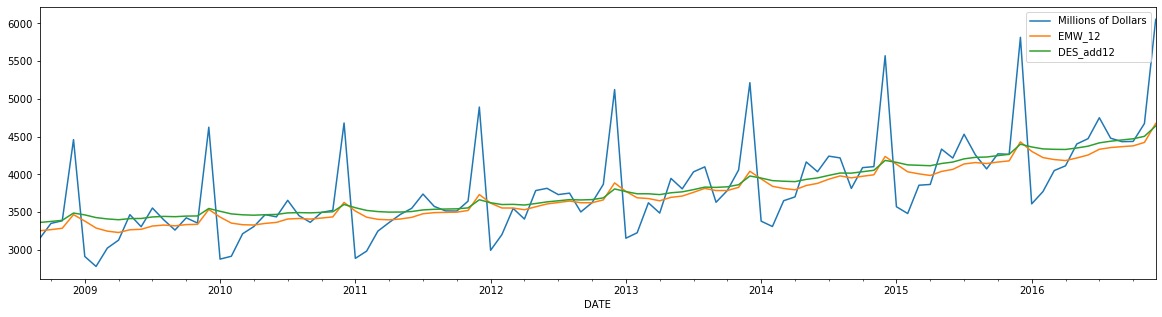

In [19]:
df[['Millions of Dollars','EMW_12','DES_add12']].iloc[200:300].plot(figsize=(20,5)).autoscale(axis='x',tight=True)

In [20]:
df['DES_mul12'] = ExponentialSmoothing(df['Millions of Dollars'].astype(np.float),trend='mul').fit().fittedvalues.shift(-1)

C:\Users\pongp\Miniconda3\envs\minimal_ds\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


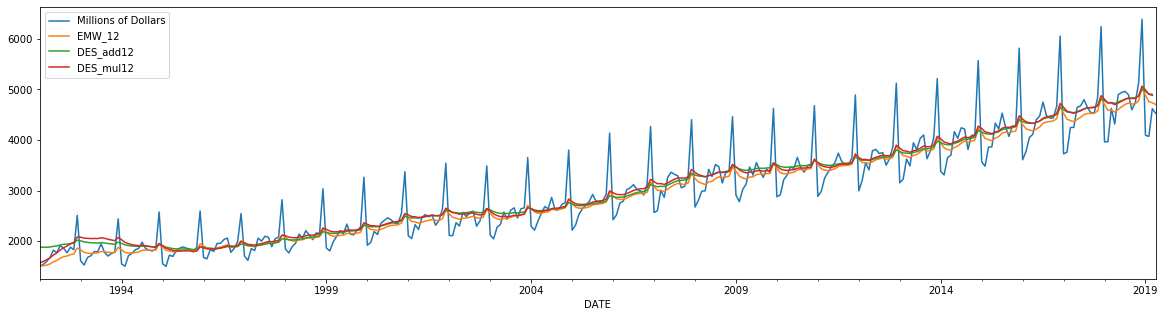

In [21]:
df[['Millions of Dollars','EMW_12','DES_add12','DES_mul12']].plot(figsize=(20,5)).autoscale(axis='x',tight=True)

### TES
#### Triple Exponential Smoothing

In [22]:
df['TES_add12'] = ExponentialSmoothing(df['Millions of Dollars'].astype(np.float),trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues.shift(0)

In [23]:
df['TES_mul12'] = ExponentialSmoothing(df['Millions of Dollars'].astype(np.float),trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues.shift(0)

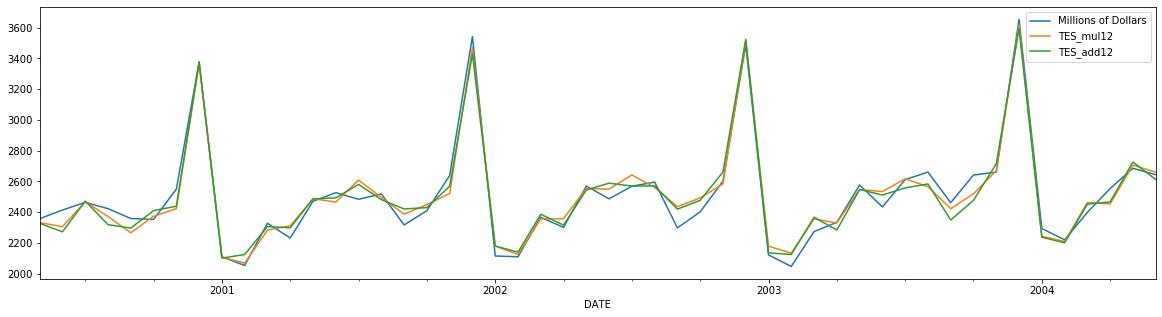

In [24]:
df[['Millions of Dollars','TES_mul12','TES_add12']].iloc[100:150].plot(figsize=(20,5)).autoscale(axis='x',tight=True)

In [25]:
df.head()

,Millions of Dollars,SMA_6,SMA_12,EMW_12,SES12,DES_add12,DES_mul12,TES_add12,TES_mul12
DATE,,,,,,,,,
1992-01-01,1509,NaN,NaN,1509.000000,1509.000000,1884.247224,1569.877445,1476.052023,1522.499647
1992-02-01,1541,NaN,NaN,1513.923077,1513.923077,1880.907854,1599.370016,1501.678526,1500.941145
1992-03-01,1597,NaN,NaN,1526.704142,1526.704142,1880.363691,1632.296330,1586.054213,1659.966995
1992-04-01,1675,NaN,NaN,1549.518889,1549.518889,1884.395693,1671.233092,1658.442267,1665.546175
1992-05-01,1822,NaN,NaN,1591.439060,1591.439060,1898.358546,1724.325498,1801.661983,1800.533756


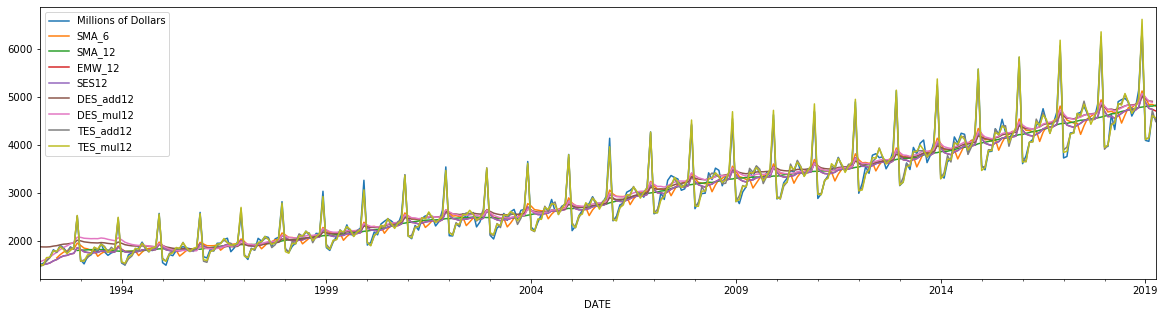

In [26]:
df.plot(figsize=(20,5));

## Forecasting with the Holt-Winters Method

In [27]:
train_data = df.iloc[:268]
test_data = df.iloc[268:]

In [28]:
fitted_model_add = ExponentialSmoothing(train_data['Millions of Dollars'].astype(np.float),trend='add',seasonal='add',seasonal_periods=12).fit()
fitted_model_mul = ExponentialSmoothing(train_data['Millions of Dollars'].astype(np.float),trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [29]:
test_predictions_add = fitted_model_add.forecast(60).rename('HW Forecast add')
test_predictions_mul = fitted_model_mul.forecast(60).rename('HW Forecast mul')

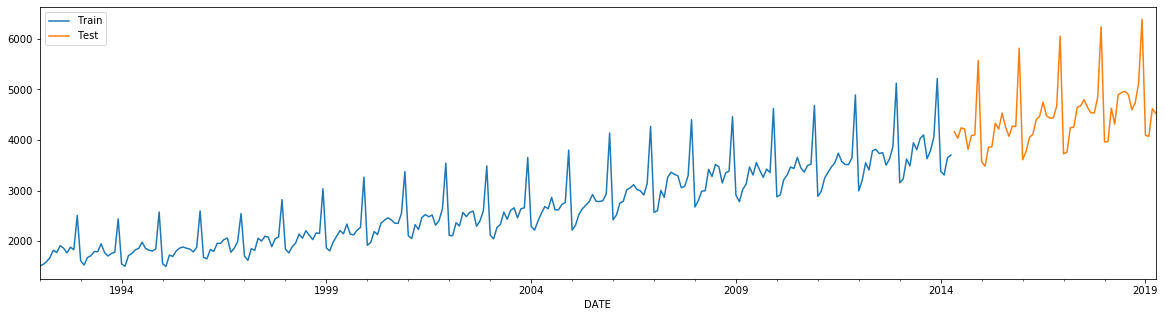

In [30]:
train_data['Millions of Dollars'].plot(legend=True,label='Train')
test_data['Millions of Dollars'].plot(legend=True,label='Test',figsize=(20,5));

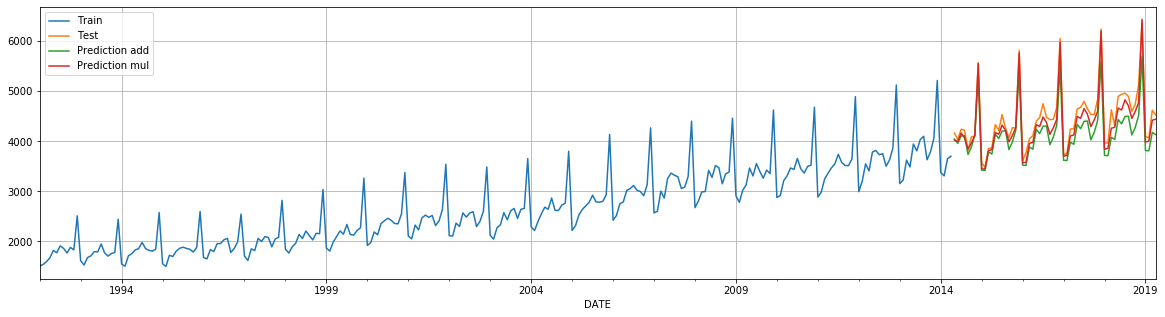

In [31]:
train_data['Millions of Dollars'].plot(legend=True,label='Train',figsize=(20,5))
test_data['Millions of Dollars'].plot(legend=True,label='Test');
test_predictions_add.plot(legend=True,label='Prediction add')
test_predictions_mul.plot(legend=True,label='Prediction mul',grid=True)

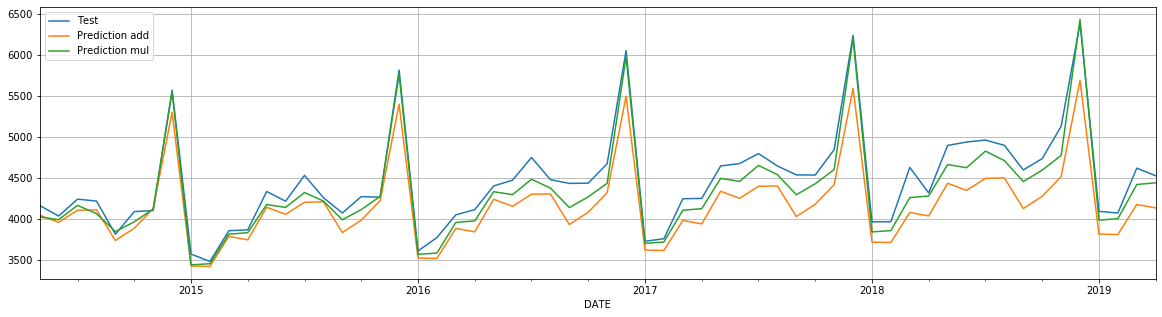

In [32]:
test_data['Millions of Dollars'].plot(legend=True,label='Test');
test_predictions_add.plot(legend=True,label='Prediction add')
test_predictions_mul.plot(legend=True,label='Prediction mul',figsize=(20,5),grid=True)

#### Multiplicative model is a better model here 

## Evaluation Metrics

In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [34]:
eva_test_data = test_data[['Millions of Dollars']]

In [35]:
mean_absolute_error(eva_test_data,test_predictions_mul)

128.6274885988146

In [36]:
mean_squared_error(eva_test_data,test_predictions_mul)

23871.21556651201

In [37]:
np.sqrt(mean_squared_error(eva_test_data,test_predictions_mul))

154.503124779119

In [38]:
eva_test_data['Millions of Dollars'].describe()

count      60.000000
mean     4461.650000
std       607.028155
min      3482.000000
25%      4085.750000
50%      4369.000000
75%      4674.500000
max      6386.000000
Name: Millions of Dollars, dtype: float64

## Forecasting into Future

In [39]:
final_model = ExponentialSmoothing(df['Millions of Dollars'].astype(np.float),trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [40]:
forecast_predictions = final_model.forecast(60)

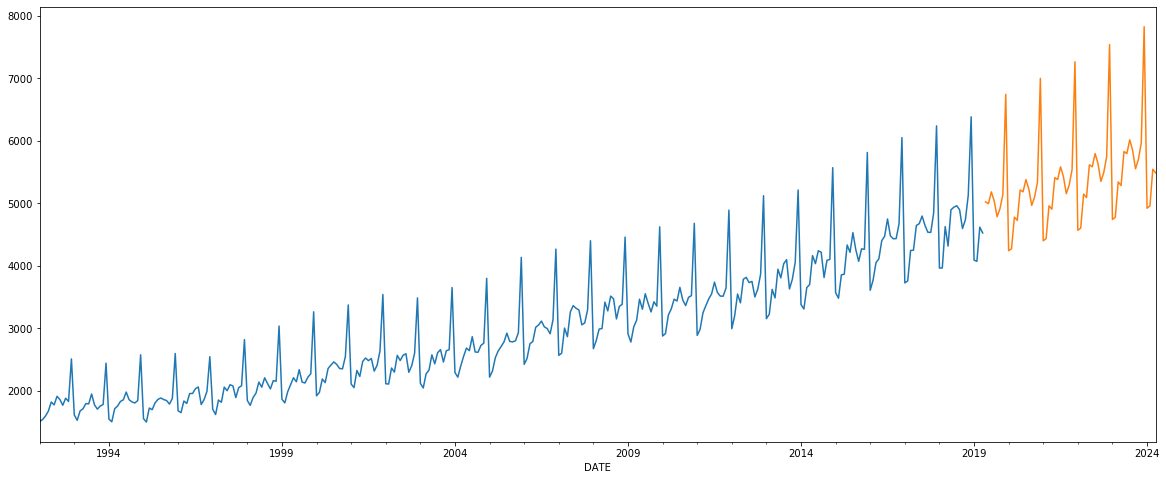

In [41]:
df['Millions of Dollars'].plot(figsize=(20,8))
forecast_predictions.plot();